In [107]:
# 역추세 알고리즘
import datetime
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# file_name = './BTCUSDT_1m_2022-06-01-00-00-00_2022-12-31-23_59_00.csv' # 횡보하는 장

# file_name = './BTCUSDT_1m_2021-03-03-00-00-00_2022-05-01-23_59_00.csv' # 큰 상승과 큰하락이 존재하는 장
file_name = './BTCUSDT_5m_2022-06-01-00-00-00_2023-01-31-00_00_00.csv'
df = pd.read_csv(file_name)
df

,datetime,open,high,low,close,volume
0,2022-06-01 00:00:00,31673.7,31714.8,31659.4,31690.9,1394.751
1,2022-06-01 00:05:00,31690.9,31709.3,31545.0,31594.8,2245.105
2,2022-06-01 00:10:00,31594.8,31640.7,31588.0,31600.8,1061.567
3,2022-06-01 00:15:00,31600.7,31646.2,31576.1,31614.5,714.347
4,2022-06-01 00:20:00,31614.5,31662.5,31580.0,31586.2,778.277
...,...,...,...,...,...,...
70268,2023-01-30 23:40:00,23171.5,23196.7,23151.1,23194.0,1426.573
70269,2023-01-30 23:45:00,23194.1,23266.6,23194.1,23253.8,5503.858
70270,2023-01-30 23:50:00,23253.8,23266.6,23222.7,23226.4,2498.830
70271,2023-01-30 23:55:00,23226.4,23282.0,23214.9,23281.6,2363.204


In [108]:
from ta.trend import IchimokuIndicator
from ta.volume import VolumeWeightedAveragePrice

ichimoku = IchimokuIndicator(high=df['high'],low=df['low'],window1=9,window2=26,window3=52,visual=True)
# visual True 로 설정하게 되면 span1 과 span2가 자동적으로 window 2기준으로 후행 이동함 
df['ichimoku_span1'] = ichimoku.ichimoku_a()
df['ichimoku_span2'] = ichimoku.ichimoku_b()
df['ichimoku_conversion_line'] = ichimoku.ichimoku_conversion_line()
df['ichimoku_base_line'] = ichimoku.ichimoku_base_line() 

df = df.dropna()
df_5m = df[1:]
df_5m

,datetime,open,high,low,close,volume,ichimoku_span1,ichimoku_span2,ichimoku_conversion_line,ichimoku_base_line
51,2022-06-01 04:15:00,31703.6,31779.0,31703.6,31718.6,1851.841,32092.400,31986.25,31784.60,31874.85
52,2022-06-01 04:20:00,31718.5,31759.8,31670.8,31682.8,1389.448,32092.400,31986.25,31764.35,31854.25
53,2022-06-01 04:25:00,31682.8,31714.2,31654.9,31698.2,837.299,32078.600,31986.25,31690.95,31854.25
54,2022-06-01 04:30:00,31698.1,31775.2,31694.7,31745.1,937.089,32068.350,31986.25,31672.50,31854.25
55,2022-06-01 04:35:00,31745.0,31748.1,31673.3,31681.9,668.763,32048.975,31986.25,31670.50,31854.25
...,...,...,...,...,...,...,...,...,...,...
70268,2023-01-30 23:40:00,23171.5,23196.7,23151.1,23194.0,1426.573,23078.525,23300.60,23122.25,23089.50
70269,2023-01-30 23:45:00,23194.1,23266.6,23194.1,23253.8,5503.858,23078.525,23285.95,23166.30,23113.30
70270,2023-01-30 23:50:00,23253.8,23266.6,23222.7,23226.4,2498.830,23074.600,23273.65,23185.45,23138.40
70271,2023-01-30 23:55:00,23226.4,23282.0,23214.9,23281.6,2363.204,23078.350,23264.95,23200.60,23153.75


In [109]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 그래프 체크해보기
df_split = df[-1440:]
fig=make_subplots(rows=1, cols=1)

candle = go.Candlestick(name ='ohlc',
                        x=df_split['datetime'],
                        open=df_split['open'],
                        high=df_split['high'],
                        low=df_split['low'],
                        close=df_split['close'])

ichimoku_span1 = go.Scatter(name ='ichimoku_span1',x=df_split['datetime'], y=df_split['ichimoku_span1'])
ichimoku_span2 = go.Scatter(name ='ichimoku_span2',x=df_split['datetime'], y=df_split['ichimoku_span2'])



fig.add_trace(candle,row=1,col=1)
fig.add_trace(ichimoku_span1,row=1,col=1)
fig.add_trace(ichimoku_span2,row=1,col=1)

fig.show()
# 구름대 실제 차트와 동일하게 형성됨

In [72]:
# 거래량 0 인거 있는지 체크
df[df['volume']==0]

,datetime,open,high,low,close,volume,ichimoku_span1,ichimoku_span2,ichimoku_conversion_line,ichimoku_base_line


In [85]:
# 1시간봉 체크
from ta.trend import IchimokuIndicator
from ta.volume import VolumeWeightedAveragePrice

file_name = './BTCUSDT_1h_2022-05-29-17-00-00_2023-01-31-00_00_00.csv'
df_1h = pd.read_csv(file_name)

ichimoku = IchimokuIndicator(high=df_1h['high'],low=df_1h['low'],window1=9,window2=26,window3=52,visual=True)
# visual True 로 설정하게 되면 span1 과 span2가 자동적으로 window 2기준으로 후행 이동함 
df_1h['ichimoku_span1'] = ichimoku.ichimoku_a()
df_1h['ichimoku_span2'] = ichimoku.ichimoku_b()
df_1h['ichimoku_conversion_line'] = ichimoku.ichimoku_conversion_line()
df_1h['ichimoku_base_line'] = ichimoku.ichimoku_base_line() 

df_1h = df_1h.dropna()
df_1h = df_1h[6:]
df_1h

,datetime,open,high,low,close,volume,ichimoku_span1,ichimoku_span2,ichimoku_conversion_line,ichimoku_base_line
56,2022-06-01 01:00:00,32045.9,32427.5,31815.3,32148.5,46017.478,30322.225,29962.0,31824.75,31433.85
57,2022-06-01 02:00:00,32148.4,32188.0,31871.0,32106.5,20095.824,30317.625,29962.0,31824.75,31480.25
58,2022-06-01 03:00:00,32106.5,32146.5,31562.0,31671.7,22696.904,30317.625,29962.0,31824.75,31480.25
59,2022-06-01 04:00:00,31671.7,31779.0,31569.0,31618.9,14481.731,30317.625,29962.0,31824.75,31480.25
60,2022-06-01 05:00:00,31618.5,31804.3,31586.2,31804.3,7666.311,30317.625,29962.0,31824.75,31480.25
...,...,...,...,...,...,...,...,...,...,...
5907,2023-01-30 20:00:00,23245.2,23273.1,23001.0,23075.2,40392.871,23240.850,23175.0,23384.00,23481.85
5908,2023-01-30 21:00:00,23075.2,23149.5,22930.0,23075.1,39696.579,23235.850,23175.0,23348.50,23446.35
5909,2023-01-30 22:00:00,23075.2,23129.1,23046.8,23055.3,14726.501,23333.300,23255.0,23339.10,23446.35
5910,2023-01-30 23:00:00,23055.2,23282.0,23025.5,23281.6,31306.035,23343.475,23255.0,23339.10,23446.35


In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 그래프 체크해보기
df_1h_split = df_1h[:1000]
fig=make_subplots(rows=1, cols=1)

candle = go.Candlestick(name ='ohlc',
                        x=df_1h_split['datetime'],
                        open=df_1h_split['open'],
                        high=df_1h_split['high'],
                        low=df_1h_split['low'],
                        close=df_1h_split['close'])

ichimoku_span1 = go.Scatter(name ='ichimoku_span1',x=df_1h_split['datetime'], y=df_1h_split['ichimoku_span1'])
ichimoku_span2 = go.Scatter(name ='ichimoku_span2',x=df_1h_split['datetime'], y=df_1h_split['ichimoku_span2'])



fig.add_trace(candle,row=1,col=1)
fig.add_trace(ichimoku_span1,row=1,col=1)
fig.add_trace(ichimoku_span2,row=1,col=1)

fig.show()
# 구름대 실제 차트와 동일하게 형성됨

In [29]:
# import datetime
# import pandas as pd
# import numpy as np
# import plotly.graph_objects as go

# # df = pd.read_csv('preprocessing_BTCUSDT_1m_2022-06-01-00-00-00_2022-12-31-23_59_00.csv')
# df = pd.read_csv('preprocessing_BTCUSDT_1m_2021-03-03-00-00-00_2022-05-01-23_59_00.csv')
# df

In [76]:
import math

# usdt로 매매할수 있는 btc 수량  (usdt -> btc)
def cal_btc_amount(usdt_balance,cur_price):
    """
    거래시점 기준 usdt 으로 얼마만큼의 btc를 구매할수 있는지 계산
    :params float usdt_balance : 구매하고 싶은 usdt 수량
    :params float cur_price : 현재 시점 BTC 가격
    :return amount ex) 0.012 (단위 BTC)
    :rtype float
    """
    # 소수점 자리에서 내림해야하기 때문에 다음과 같이 구현
    amount = math.floor((usdt_balance*1000)/cur_price)/1000 # 최소 단위가 0.001 BTC이므로
    
    return amount

# btc를 usdt 단위로 변환 (btc -> usdt)
def cal_usdt_amount(btc_amount,cur_price):
    """
    거래시점 기준 usdt 으로 얼마만큼의 btc를 구매할수 있는지 계산
    :params float btc_amount : btc_amount
    :params float cur_price : 현재 시점 BTC 가격
    :return amount ex) 126.156 (단위 usdt)
    :rtype float
    """
    return cur_price*btc_amount

# btc 매매 수량에 따른 수수료 계산 
def cal_trade_fee(trade_type,cur_price,btc_amount):
    """
    거래시점 기준 체결된 BTC 수량의 수수료 구하기
    :params str trade_type : 'market' or 'limit' / 시장가 or 지정가
    :params float cur_price : 현재 시점 BTC(또는 다른 코인) 가격
    :params float btc_amount : btc 보유량
    :return cur_trade_fee ex) BTC/USDT라면 0.00915 (단위 usdt)
    :rtype float
    """
    # 거래수수료 (시장가 : 0.04%, 지정가 : 0.02% , 슬리피지 : 0.01% (여기선 시장가에 슬리피지 고려 0.05% 설정))
    # binance 기준
    
    if trade_type == 'market':
        fee = 0.0004 # 0.04 %
    elif trade_type == 'limit':
        fee = 0.0002 # 0.02 %
    
    usdt = cur_price*btc_amount
    cur_trade_fee = usdt*(fee+0.0001) # 슬리피지 고려
    
    return cur_trade_fee

In [94]:
from tqdm.notebook import tqdm

def run_test(config):
    df = config['df']
    
    balance = 1000   # 잔고 usdt 기준 100만원
    balance_rate = 1 # 잔고 사용 비율, 2이면 2배 레버리지 사용

    span1 = df['ichimoku_span1']
    span2 = df['ichimoku_span2']

    
    open_long_cnt = 0      #롱포지션 오픈 횟수
    
    open_short_cnt = 0     #숏포지션 오픈 횟수

    revenue_t = 0          #누적수익
    open_tot_cnt = 0        #백테스트 기간 중 오픈횟수

    revenue_list = []      #중간에 저장할 누적수익
    price_list = []        #중간에 저장할 자산 가격
    
    position = [] # 보유중인 코인의 오픈 시점의 가격과 수량 확인
    
    ### df 의 제일 처음 타임스텝의 종가의 위치 파악 ###
    close = round(df.iloc[0:1]['close'].values[0],4)       

    span_1  = round(df.iloc[0:1]['ichimoku_span1'].values[0],4)
    span_2  = round(df.iloc[0:1]['ichimoku_span2'].values[0],4)   
    
    max_span = max(span_1,span_2)
    min_span = min(span_1,span_2)
    
    if close>max_span:
        flag_1 = 'U'
    elif close<min_span:
        flag_1 = 'D'
    else:
        flag_1 = 'M'
        
    #####################################################
    
    for i in tqdm(range(1,len(df))): 
        
        t      = df.iloc[i:i+1]['datetime'].values[0]            # 현재 타임스텝 시간
        
        close = round(df.iloc[i:i+1]['close'].values[0],4)       # 현재 타임스텝 종가

        if i%100 == 0: #100분에 한번씩 중간 수익 기록하기
            revenue_list.append(revenue_t)
            price_list.append(close)
        
        
        span_1  = round(df.iloc[i:i+1]['ichimoku_span1'].values[0],4)   # 이전 타임스텝의 wma1
        span_2  = round(df.iloc[i:i+1]['ichimoku_span2'].values[0],4)   # 이전 타임스텝의 wma2

        max_span = max(span_1,span_2)
        min_span = min(span_1,span_2)
        
        # 현재 타임스텝의 종가 위치 파악
        if close>max_span:
            now_flag = 'U'
        elif close<min_span:
            now_flag = 'D'
        else:
            now_flag = 'M'
        
        
        # 제일 처음 타임스텝의 경우만 M일경우가 존재 처음에 중앙에 있다면 
        # 위에서 내려온지 아래에서 올라온지 모르기때문에 flag_1을 위인지 아래인지 알때까지 세팅해줘야함
        if flag_1 == 'M': 
            if now_flag == 'U' or 'D':
                
                # flag_1 만 업데이트해주고 아직 포지션 오픈은 하지 않음 
                # 우리는 정확히 U->D , D->U가 확인될때만 매수 매도 진행
                
                flag_1 = now_flag
                continue 
                
            else: # 또 M일 경우는 그대로 진행
                continue
        
        elif flag_1 == 'U':
            if now_flag == 'D': # 위에서 아래로 내려왔을 경우만 포지션 오픈
                flag_1 = 'D' # 아래로 내려왔기 때문에 다시 D로 세팅
                
            else:  # 
                continue
                
        elif flag_1 == 'D':
            if now_flag == 'U': # 아래에서 위로 올라왔을 경우만 포지션 오픈
                flag_1 = 'U'
                
            else:
                continue
                
        ############### U->D or D->U 인 경우 #############################
        
        open_tot_cnt+=1
        
        # 포지션 오픈 + 포지션 종료 (매수 시점과 동시에 매도를 진행하기때문에 같이 진행함)
        if now_flag == 'D': # U->D 인 경우
            if position == []: # 아직 포지션 오픈이 진행되지 않은 경우 (숏포지션 오픈)
                open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
                open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
                open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산
                
                balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
                revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재
                
                position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량
                
                print(f"[{i} || Short Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} || total revenue:{revenue_t}")

                
                continue
                
            else: # 포지션 오픈이 되어져 있는 경우 (롱포지션 종료 + 숏포지션 오픈)
                
                # 롱 포지션 종료 #
                open_btc_price, open_btc_amount = position # 오픈 btc 가격, 수량
                
                now_revenue = (close - open_btc_price) * open_btc_amount # 롱포지션 종료 수익
                
                close_usdt_amount = open_btc_price*open_btc_amount + now_revenue # 오픈시점의 가격*수량 + 수익 이 들어옴
                
                close_trade_fee = cal_trade_fee('market',close,open_btc_amount) # 수수료 계산
                
                balance = balance + close_usdt_amount - close_trade_fee
                revenue_t = revenue_t + now_revenue - close_trade_fee
                
                print(f"[{i} || Long Close] time:{t} || close_btc_amount :{open_btc_amount} || close_btc_price : {close} || close_usdt_amount : {close_usdt_amount} || close_trade_fee: {close_trade_fee} || balance : {balance} || now_revenue : {now_revenue} || total revenue:{revenue_t}")
                
                # 숏 포지션 오픈 # 
                open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
                open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
                open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산
                
                balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
                revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재
                
                position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량                
                print(f"[{i} || Short Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} || total revenue:{revenue_t}")                
                
        elif now_flag =='U': # D->U 인 경우
            if position == []: # 아직 포지션 오픈이 진행되지 않은 경우 (롱포지션 오픈)
                open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
                open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
                open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산
                
                balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
                revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재
                
                position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량
                
                print(f"[{i} || Long Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} || total revenue:{revenue_t}")
                
                continue
                
            else: # 포지션 오픈이 되어져 있는 경우 (숏포지션 종료 + 롱포지션 오픈)
                
                # 숏 포지션 종료 #
                open_btc_price, open_btc_amount = position # 오픈 btc 가격, 수량
                
                now_revenue = -(close - open_btc_price) * open_btc_amount # 숏포지션 종료 수익 (숏은 반대로 금액이 들어옴)
                
                close_usdt_amount = open_btc_price*open_btc_amount + now_revenue # 오픈시점의 가격*수량 + 수익 이 들어옴
                
                close_trade_fee = cal_trade_fee('market',close,open_btc_amount) # 수수료 계산
                
                balance = balance + close_usdt_amount - close_trade_fee
                revenue_t = revenue_t + now_revenue - close_trade_fee
                
                print(f"[{i} || Short Close] time:{t} || close_btc_amount :{open_btc_amount} || close_btc_price : {close} || close_usdt_amount : {close_usdt_amount} || close_trade_fee: {close_trade_fee} || balance : {balance} || now_revenue : {now_revenue} || total revenue:{revenue_t}")

                # 롱 포지션 오픈 # 
                open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
                open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
                open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산
                
                balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
                revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재
                
                position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량  
                
                print(f"[{i} || Long Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} || total revenue:{revenue_t}")

        
    print(f"revenue:{revenue_t} open_tot_cnt:{open_tot_cnt}")
    
    return revenue_t,revenue_list,price_list

## 단일 테스트

In [110]:
config_data= {
    'df': df_5m
}
revenue,revenue_list,price_list = run_test(config_data)

  0%|          | 0/70221 [00:00<?, ?it/s]

[51 || Long Open] time:2022-06-01 08:30:00 || open_btc_amount :0.028 || open_btc_price : 31880.5 || open_usdt_amount : 892.654 || open_trade_fee: 0.44632700000000003 || balance : 106.899673 || total revenue:-0.44632700000000003
[90 || Long Close] time:2022-06-01 11:45:00 || close_btc_amount :0.028 || close_btc_price : 31757.6 || close_usdt_amount : 889.2127999999999 || close_trade_fee: 0.4446064 || balance : 995.6678665999999 || now_revenue : -3.4412000000000407 || total revenue:-4.332133400000041
[90 || Short Open] time:2022-06-01 11:45:00 || open_btc_amount :0.028 || open_btc_price : 31757.6 || open_usdt_amount : 889.2128 || open_trade_fee: 0.4446064 || balance : 106.0104601999999 || total revenue:-4.7767398000000405
[162 || Short Close] time:2022-06-01 17:45:00 || close_btc_amount :0.028 || close_btc_price : 31598.6 || close_usdt_amount : 893.6648 || close_trade_fee: 0.4423804 || balance : 999.2328797999999 || now_revenue : 4.452 || total revenue:-0.7671202000000406
[162 || Long Ope

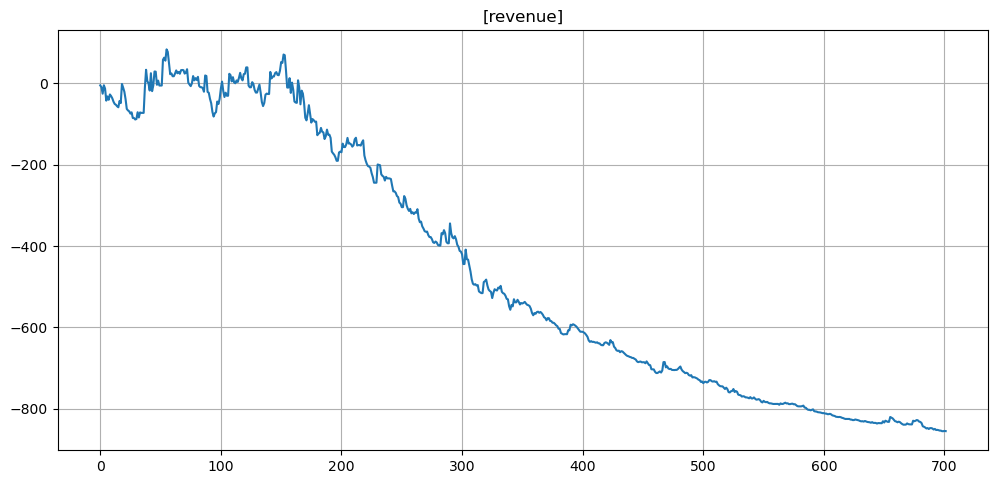

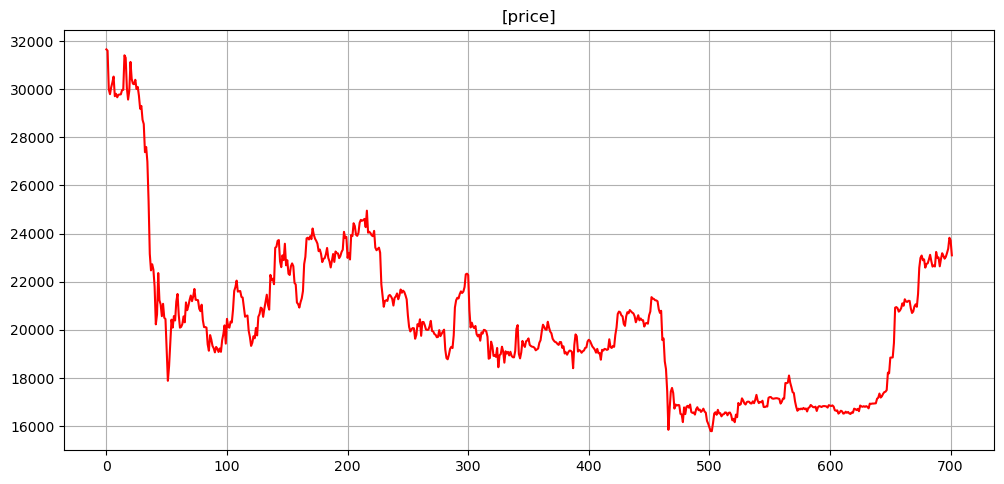

In [111]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12)) # 그래프 사이즈 결정
plt.subplot(2, 1, 1)               # 서브플롯 설정
plt.plot(revenue_list)             # 수익률 그래프 그리기
plt.grid(True)                    # 눈금선 넣기
plt.title('[revenue]')             # 타이틀 설정

fig = plt.figure(figsize=(12, 12)) 
plt.subplot(2, 1, 2)  
plt.plot(price_list, color='red')
plt.grid(True)
plt.title('[price]')
plt.show()

In [100]:
# 매수 매도 시점 파악해보기 (오류 체크)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

start_point = 2000

period = 1000

df_org_split = df[start_point:start_point+period]

fig=make_subplots(rows=1, cols=1)
candle = go.Candlestick(name ='ohlc',
                        x=df_org_split['datetime'],
                        open=df_org_split['open'],
                        high=df_org_split['high'],
                        low=df_org_split['low'],
                        close=df_org_split['close'])

ichimoku_span1 = go.Scatter(name ='ichimoku_span1',x=df_org_split['datetime'], y=df_org_split['ichimoku_span1'])
ichimoku_span2 = go.Scatter(name ='ichimoku_span2',x=df_org_split['datetime'], y=df_org_split['ichimoku_span2'])

fig.add_trace(candle,row=1,col=1)
fig.add_trace(ichimoku_span1,row=1,col=1)
fig.add_trace(ichimoku_span2,row=1,col=1)


balance = 1000   # 잔고 usdt 기준 100만원
balance_rate = 1 # 잔고 사용 비율, 2이면 2배 레버리지 사용

span1 = df['ichimoku_span1']
span2 = df['ichimoku_span2']


open_long_cnt = 0      #롱포지션 오픈 횟수

open_short_cnt = 0     #숏포지션 오픈 횟수

revenue_t = 0          #누적수익
open_tot_cnt = 0        #백테스트 기간 중 오픈횟수

revenue_list = []      #중간에 저장할 누적수익
price_list = []        #중간에 저장할 자산 가격

position = [] # 보유중인 코인의 오픈 시점의 가격과 수량 확인


### df 의 제일 처음 타임스텝의 종가의 위치 파악 ###
close = round(df.iloc[start_point:start_point+1]['close'].values[0],4)       

span_1  = round(df.iloc[start_point:start_point+1]['ichimoku_span1'].values[0],4)
span_2  = round(df.iloc[start_point:start_point+1]['ichimoku_span2'].values[0],4)   

max_span = max(span_1,span_2)
min_span = min(span_1,span_2)

if close>max_span:
    flag_1 = 'U'
elif close<min_span:
    flag_1 = 'D'
else:
    flag_1 = 'M'

#####################################################

for i in tqdm(range(start_point+1,start_point+period)): 

    t      = df.iloc[i:i+1]['datetime'].values[0]            # 현재 타임스텝 시간

    close = round(df.iloc[i:i+1]['close'].values[0],4)       # 현재 타임스텝 종가

    if i%100 == 0: #100분에 한번씩 중간 수익 기록하기
        revenue_list.append(revenue_t)
        price_list.append(close)


    span_1  = round(df.iloc[i:i+1]['ichimoku_span1'].values[0],4)   # 이전 타임스텝의 wma1
    span_2  = round(df.iloc[i:i+1]['ichimoku_span2'].values[0],4)   # 이전 타임스텝의 wma2

    max_span = max(span_1,span_2)
    min_span = min(span_1,span_2)

    # 현재 타임스텝의 종가 위치 파악
    if close>max_span:
        now_flag = 'U'
    elif close<min_span:
        now_flag = 'D'
    else:
        now_flag = 'M'


    # 제일 처음 타임스텝의 경우만 M일경우가 존재 처음에 중앙에 있다면 
    # 위에서 내려온지 아래에서 올라온지 모르기때문에 flag_1을 위인지 아래인지 알때까지 세팅해줘야함
    if flag_1 == 'M': 
        if now_flag == 'U' or 'D':

            # flag_1 만 업데이트해주고 아직 포지션 오픈은 하지 않음 
            # 우리는 정확히 U->D , D->U가 확인될때만 매수 매도 진행

            flag_1 = now_flag
            continue 

        else: # 또 M일 경우는 그대로 진행
            continue

    elif flag_1 == 'U':
        if now_flag == 'D': # 위에서 아래로 내려왔을 경우만 포지션 오픈
            flag_1 = 'D' # 아래로 내려왔기 때문에 다시 D로 세팅

        else:  # 
            continue

    elif flag_1 == 'D':
        if now_flag == 'U': # 아래에서 위로 올라왔을 경우만 포지션 오픈
            flag_1 = 'U'

        else:
            continue

    ############### U->D or D->U 인 경우 #############################

    open_tot_cnt+=1

    # 포지션 오픈 + 포지션 종료 (매수 시점과 동시에 매도를 진행하기때문에 같이 진행함)
    if now_flag == 'D': # U->D 인 경우
        fig.add_annotation(
                x=df.iloc[i:i+1]['datetime'].values[0],
                y=round(df.iloc[i:i+1]['close'].values[0],4),
                text='D',row=1,col=1
                )
        
        if position == []: # 아직 포지션 오픈이 진행되지 않은 경우 (숏포지션 오픈)
            open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
            open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
            open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산

            balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
            revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재

            position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량

            print(f"[{i} || Short Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} \
            || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} \
            || total revenue:{revenue_t}")


            continue

        else: # 포지션 오픈이 되어져 있는 경우 (롱포지션 종료 + 숏포지션 오픈)

            # 롱 포지션 종료 #
            open_btc_price, open_btc_amount = position # 오픈 btc 가격, 수량

            now_revenue = (close - open_btc_price) * open_btc_amount # 롱포지션 종료 수익

            close_usdt_amount = open_btc_price*open_btc_amount + now_revenue # 오픈시점의 가격*수량 + 수익 이 들어옴

            close_trade_fee = cal_trade_fee('market',close,open_btc_amount) # 수수료 계산

            balance = balance + close_usdt_amount - close_trade_fee
            revenue_t = revenue_t + now_revenue - close_trade_fee

            print(f"[{i} || Long Close] time:{t} || close_btc_amount :{open_btc_amount} || close_btc_price : {close} \
            || close_usdt_amount : {close_usdt_amount} || close_trade_fee: {close_trade_fee} || balance : {balance} \
            || now_revenue : {now_revenue} || total revenue:{revenue_t}")

            # 숏 포지션 오픈 # 
            open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
            open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
            open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산

            balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
            revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재

            position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량                
            print(f"[{i} || Short Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} \
            || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} \
            || total revenue:{revenue_t}")                

    elif now_flag =='U': # D->U 인 경우
        fig.add_annotation(
            x=df.iloc[i:i+1]['datetime'].values[0],
            y=round(df.iloc[i:i+1]['close'].values[0],4),
            text='U',row=1,col=1
            )    
    
        if position == []: # 아직 포지션 오픈이 진행되지 않은 경우 (롱포지션 오픈)
            open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
            open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
            open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산

            balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
            revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재

            position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량

            print(f"[{i} || Long Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} \
            || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} \
            || total revenue:{revenue_t}")

            continue

        else: # 포지션 오픈이 되어져 있는 경우 (숏포지션 종료 + 롱포지션 오픈)

            # 숏 포지션 종료 #
            open_btc_price, open_btc_amount = position # 오픈 btc 가격, 수량

            now_revenue = -(close - open_btc_price) * open_btc_amount # 숏포지션 종료 수익 (숏은 반대로 금액이 들어옴)

            close_usdt_amount = open_btc_price*open_btc_amount + now_revenue # 오픈시점의 가격*수량 + 수익 이 들어옴

            close_trade_fee = cal_trade_fee('market',close,open_btc_amount) # 수수료 계산

            balance = balance + close_usdt_amount - close_trade_fee
            revenue_t = revenue_t + now_revenue - close_trade_fee

            print(f"[{i} || Short Close] time:{t} || close_btc_amount :{open_btc_amount} || close_btc_price : {close} \
            || close_usdt_amount : {close_usdt_amount} || close_trade_fee: {close_trade_fee} || balance : {balance} \
            || now_revenue : {now_revenue} || total revenue:{revenue_t}")

            # 롱 포지션 오픈 # 
            open_btc_amount = cal_btc_amount(balance*0.9,close) # 현재 잔고대비 90프로 구매할수 있는 수량 계산
            open_trade_fee = cal_trade_fee('market',close,open_btc_amount) # btc 수량에 따른 수수료 계산
            open_usdt_amount = cal_usdt_amount(open_btc_amount,close) # 구매한 btc 수량에 따른 usdt금액 계산

            balance = balance - open_usdt_amount - open_trade_fee # 구매한만큼 금액 차감
            revenue_t = revenue_t - open_trade_fee # 수수료만큼의 손해 존재

            position = [close,open_btc_amount] # 포지션 오픈 가격, btc 수량  

            print(f"[{i} || Long Open] time:{t} || open_btc_amount :{open_btc_amount} || open_btc_price : {close} \
            || open_usdt_amount : {open_usdt_amount} || open_trade_fee: {open_trade_fee} || balance : {balance} \
            || total revenue:{revenue_t}")


print(f"revenue:{revenue_t} open_tot_cnt:{open_tot_cnt}")

  0%|          | 0/999 [00:00<?, ?it/s]

[2058 || Short Open] time:2022-06-08 07:45:00 || open_btc_amount :0.029 || open_btc_price : 30360.7             || open_usdt_amount : 880.4603000000001 || open_trade_fee: 0.44023015000000004 || balance : 119.09946984999992             || total revenue:-0.44023015000000004
[2059 || Short Close] time:2022-06-08 07:50:00 || close_btc_amount :0.029 || close_btc_price : 31477.0             || close_usdt_amount : 848.0876000000001 || close_trade_fee: 0.45641650000000006 || balance : 966.7306533499999             || now_revenue : -32.37269999999998 || total revenue:-33.26934664999998
[2059 || Long Open] time:2022-06-08 07:50:00 || open_btc_amount :0.027 || open_btc_price : 31477.0             || open_usdt_amount : 849.879 || open_trade_fee: 0.4249395 || balance : 116.42671384999989             || total revenue:-33.69428614999998
[2110 || Long Close] time:2022-06-08 12:05:00 || close_btc_amount :0.027 || close_btc_price : 30919.6             || close_usdt_amount : 834.8292 || close_trade_fee: 

In [101]:
fig.show()